In [16]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, AveragePooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam


# Create Autoencoder
def LCA_Net(image_size, gray=False):
    kernel_size = 3  # (3, 3)
    pooling_size = 2  # (2, 2)

    image_shape = np.concatenate((image_size, [1] if gray else [3]))

    model = Sequential()

    # Input layer
    model.add(Input(shape=image_shape))

    #########
    # Encoder
    # Conv
    model.add(Conv2D(50, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(AveragePooling2D(pooling_size, padding='same'))
    model.add(Conv2D(50, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(AveragePooling2D(pooling_size, padding='same'))
    # Dense
    model.add(Dense(10))

    # Decoder
    # Dense
    model.add(Dense(10))
    # Conv
    model.add(Conv2D(50, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(UpSampling2D(pooling_size))
    model.add(Conv2D(50, kernel_size=kernel_size, activation='relu', padding='same'))
    model.add(UpSampling2D(pooling_size))

    # Output layer
    # model.add(Conv2D(3, kernel_size=kernel_size, activation='sigmoid', padding='same'))
    model.add(Conv2D(3, kernel_size=kernel_size, activation='relu', padding='same'))

    # Compile & build model
    opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)   # this settings are default
    model.compile(optimizer=opt, loss='mse')
    # model.compile(optimizer='adam', loss='binary_crossentropy')
    model.build()

    model.summary()

    return model


In [2]:
import numpy as np
import os
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image


def image_float_to_uint(image):
    if np.max(image) <= 1:  # image between [0, 1]
        return (image * 255).astype(np.uint8)
    else:  # image between [0, 255]
        return image.astype(np.uint8)


def image_uint_to_float(image):
    if np.max(image) <= 1:  # image between [0, 1]
        return image
    else:
        return (image / 255).astype(np.float)


def get_all_img(directory):
    images = sorted(os.listdir(os.path.join(directory)))  # os.listdir gives a list of all files name in this path
    data = []
    for image in images:
        data.append(mpimg.imread(os.path.join(directory, image)))
    return np.array(data)


def plot_before_after(before, after, file_name=""):
    plt.figure(figsize=(15, 5))  # Size of figure (all plot)

    plt.subplot(1, 2, 1)  # (nrows, ncols, index)
    plt.axis('off')
    plt.title("Before", fontsize=20)
    plt.imshow(before)

    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.title("After", fontsize=20)
    plt.imshow(after)

    if not file_name == "":
        plt.savefig(file_name, bbox_inches='tight')
    plt.show()


def img_resize(img_array, new_size):
    # Convert Image to array with np.array(Image) & convert np.array to Image with Image.fromarray(array)
    return np.array(Image.fromarray(img_array).resize(new_size))


def resize_all_img(directory, new_shape):
    # Creat new folder
    folder_name = directory[- directory[::-1].index('\\'):]
    new_folder_name = folder_name + str(new_shape)
    new_path = os.path.join(directory[:-len(folder_name)], new_folder_name)
    Path(new_path).mkdir(parents=True, exist_ok=True)

    # Resize images and save new image
    images = sorted(os.listdir(os.path.join(directory)))  # os.listdir gives a list of all files name in this path
    for name in images:
        image = Image.open(os.path.join(directory, name))
        image = image.resize(new_shape)
        image.save(os.path.join(new_path, str(name)))

    print("Image resizing completed")


In [1]:
#from LCA_Net import *
#from function import *

from os.path import join

#######################################################################################################################
# Load Dataset & Preprocessing

org_image_shape = (460, 620)
image_shape = (512, 512)

dataset_path = './Dataset/'
save_filename = './Results/result01.png'

# X & y are Normalized ([0, 1])
X = get_all_img(join(dataset_path, 'hazy'))
y = get_all_img(join(dataset_path, 'clear'))

#######################################################################################################################
# Build model

# Build LCA_Net Model
model = LCA_Net(image_shape)

model.fit(X, y, batch_size=16, epochs=5, verbose=1)
model.summary()

NameError: name 'get_all_img' is not defined

In [8]:
model.save_weights('./model')


In [9]:
!mkdir -p saved_model
model.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model\assets


INFO:tensorflow:Assets written to: ./my_model\assets


In [4]:
from os.path import join
dataset_path = './Dataset/'
Z = get_all_img(join(dataset_path, 'test'))

In [5]:
Z.shape


(5, 460, 620, 3)

In [3]:
import tensorflow as tf
new_model = tf.keras.models.load_model('my_model2.h5')

In [6]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 460, 620, 50)      1400      
                                                                 
 average_pooling2d (AverageP  (None, 230, 310, 50)     0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 230, 310, 50)      22550     
                                                                 
 average_pooling2d_1 (Averag  (None, 115, 155, 50)     0         
 ePooling2D)                                                     
                                                                 
 dense (Dense)               (None, 115, 155, 10)      510       
                                                                 
 dense_1 (Dense)             (None, 115, 155, 10)      1

In [7]:
image2 = new_model.predict(Z)
image2

1/1 [==============================] - 1s 706ms/step


array([[[[0.20151152, 0.17977548, 0.14759997],
         [0.35745016, 0.28695732, 0.293353  ],
         [0.37425742, 0.32138327, 0.3542508 ],
         ...,
         [0.2764673 , 0.27391955, 0.23770799],
         [0.24776544, 0.25449026, 0.23406708],
         [0.19771485, 0.17329283, 0.16869709]],

        [[0.32006013, 0.2848024 , 0.18104406],
         [0.49379775, 0.3731244 , 0.31443906],
         [0.5036998 , 0.40048617, 0.35445046],
         ...,
         [0.38436696, 0.3660118 , 0.31061578],
         [0.370188  , 0.3761961 , 0.31980315],
         [0.31855306, 0.28775913, 0.25628304]],

        [[0.3464358 , 0.34308887, 0.19395049],
         [0.48314184, 0.40664873, 0.36717388],
         [0.47811505, 0.4282995 , 0.41154337],
         ...,
         [0.3994108 , 0.3665376 , 0.35950866],
         [0.38269785, 0.38392875, 0.3829472 ],
         [0.3587177 , 0.30850685, 0.30461138]],

        ...,

        [[0.21169825, 0.2163956 , 0.08083288],
         [0.26849025, 0.22385043, 0.18882258]

In [24]:
"""
image2 = image2.reshape(1,3,460,620)
image2 = image2.reshape(3,460,620)
image2 = image2*255.0
image2 = image2.astype('uint8')
image2 = image2.reshape(460,620,3)
image2.shape"""

(460, 620, 3)

In [1]:
"""
im = Image.fromarray(image2).convert('RGB')
im"""

"\nim = Image.fromarray(image2).convert('RGB')\nim"

In [8]:
for img in image2:
    img = img.reshape(1,3,460,620)
    img = img.reshape(3,460,620)
    img = img*255.0
    img = img.astype('uint8')
    img = img.reshape(460,620,3)
    print(img)

[[[ 51  45  37]
  [ 91  73  74]
  [ 95  81  90]
  ...
  [ 70  69  60]
  [ 63  64  59]
  [ 50  44  43]]

 [[ 81  72  46]
  [125  95  80]
  [128 102  90]
  ...
  [ 98  93  79]
  [ 94  95  81]
  [ 81  73  65]]

 [[ 88  87  49]
  [123 103  93]
  [121 109 104]
  ...
  [101  93  91]
  [ 97  97  97]
  [ 91  78  77]]

 ...

 [[ 53  55  20]
  [ 68  57  48]
  [ 75  64  48]
  ...
  [ 91  62  59]
  [ 85  67  72]
  [ 72  62  58]]

 [[ 47  47  18]
  [ 59  51  41]
  [ 66  61  42]
  ...
  [ 85  65  62]
  [ 81  68  71]
  [ 64  62  53]]

 [[ 42  33  12]
  [ 54  40  41]
  [ 67  51  41]
  ...
  [ 78  45  50]
  [ 66  44  59]
  [ 48  38  37]]]
[[[ 58  53  46]
  [103  86  91]
  [108  95 110]
  ...
  [107 115 113]
  [ 98 110 109]
  [ 79  74  77]]

 [[ 93  85  58]
  [143 114 101]
  [146 122 115]
  ...
  [150 160 155]
  [146 167 155]
  [126 124 119]]

 [[101 103  62]
  [140 125 119]
  [138 132 135]
  ...
  [155 163 181]
  [152 174 184]
  [143 133 138]]

 ...

 [[ 97 109  56]
  [125 114 119]
  [134 129 128]
  ..

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


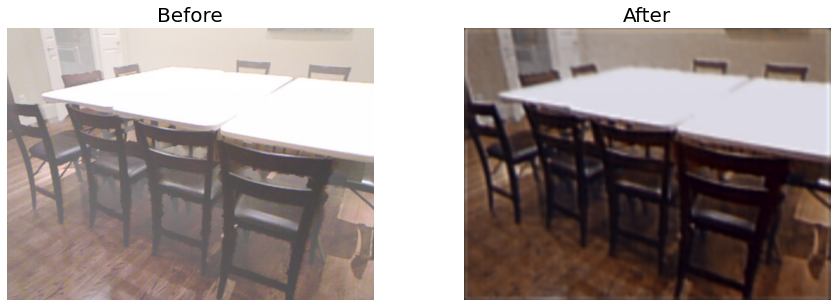

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


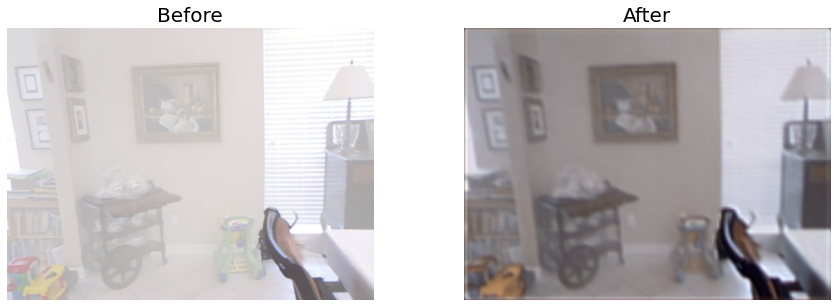

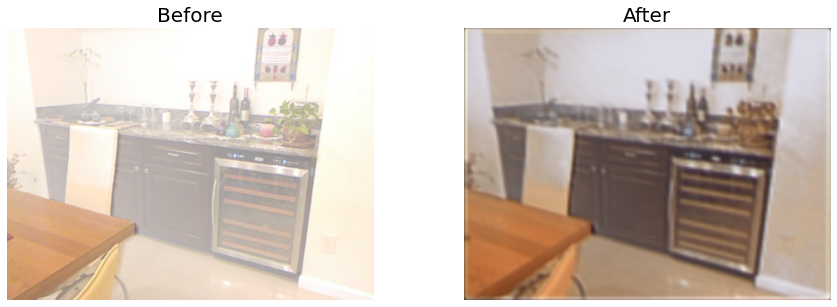

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


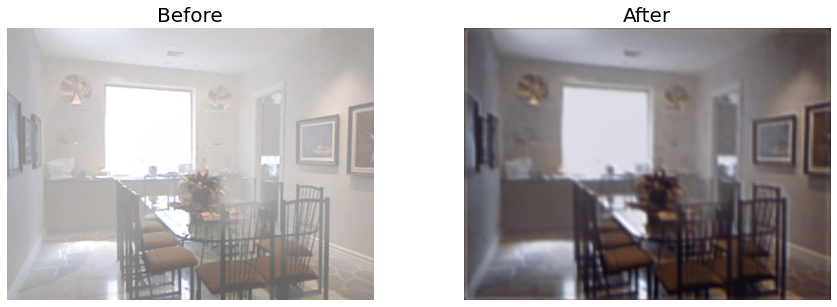

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


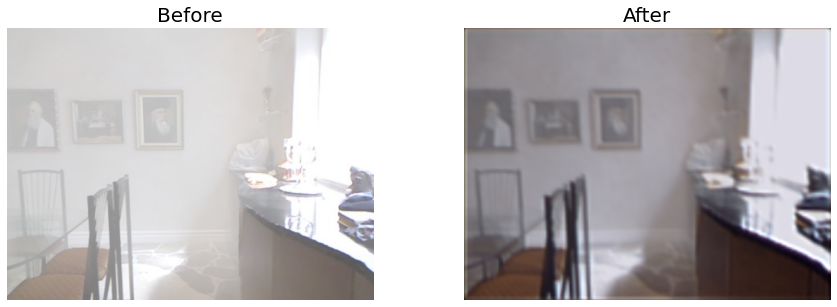

In [9]:
n = len(Z)
for i in range(n):
  plot_before_after(Z[i], image2[i])